In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#задамо один стиль для графіків 

sns.set(style = "whitegrid",
    rc    = {'figure.figsize':(10,6)},
    palette = "pastel"
)

In [2]:
path = r"shopping_trends.csv"
data = pd.read_csv(path)

In [4]:
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [6]:
data.shape

(3900, 19)

In [5]:
data.dtypes

Customer ID                   int64
Age                           int64
Gender                       object
Item Purchased               object
Category                     object
Purchase Amount (USD)         int64
Location                     object
Size                         object
Color                        object
Season                       object
Review Rating               float64
Subscription Status          object
Payment Method               object
Shipping Type                object
Discount Applied             object
Promo Code Used              object
Previous Purchases            int64
Preferred Payment Method     object
Frequency of Purchases       object
dtype: object

In [7]:
data.isna().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [8]:
data.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [9]:
# Перейменування колонок у формат snake_case
data.columns = data.columns.str.lower().str.replace(' ', '_')
data.columns

Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount_(usd)', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'payment_method',
       'shipping_type', 'discount_applied', 'promo_code_used',
       'previous_purchases', 'preferred_payment_method',
       'frequency_of_purchases'],
      dtype='object')

# Завдання 1

**Завдання 1**

Побудуйте гістограму віку клієнтів, використовуючи Seaborn. 

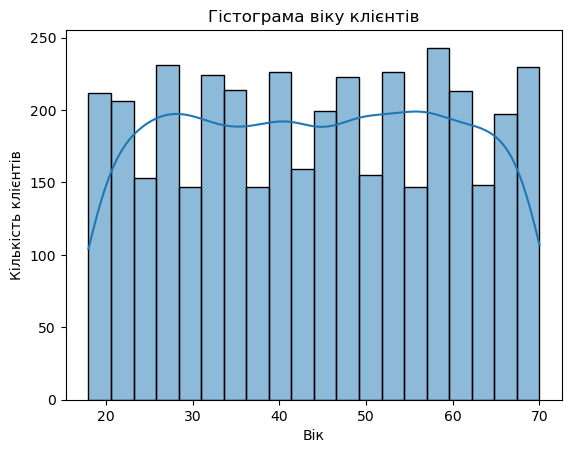

In [10]:
sns.histplot(data=data, x='age', bins=20, kde=True)
plt.title('Гістограма віку клієнтів')
plt.xlabel('Вік')
plt.ylabel('Кількість клієнтів');

### Висновок:
У магазині є багато товару для кожної вікої групи. Є певна закономірність в кількості клієнтів та їх віку, це можна більш детально дослідити та перевірити чи немає помилок в наших даних.

**Завдання 2**

Створіть стовпчасту діаграму або графік розподілу, щоб порівняти, які товари покупають клієнти найчастіше. 

In [11]:
data.item_purchased.unique()

array(['Blouse', 'Sweater', 'Jeans', 'Sandals', 'Sneakers', 'Shirt',
       'Shorts', 'Coat', 'Handbag', 'Shoes', 'Dress', 'Skirt',
       'Sunglasses', 'Pants', 'Jacket', 'Hoodie', 'Jewelry', 'T-shirt',
       'Scarf', 'Hat', 'Socks', 'Backpack', 'Belt', 'Boots', 'Gloves'],
      dtype=object)

In [12]:
data.item_purchased.value_counts().index

Index(['Blouse', 'Jewelry', 'Pants', 'Shirt', 'Dress', 'Sweater', 'Jacket',
       'Belt', 'Sunglasses', 'Coat', 'Sandals', 'Socks', 'Skirt', 'Shorts',
       'Scarf', 'Hat', 'Handbag', 'Hoodie', 'Shoes', 'T-shirt', 'Sneakers',
       'Boots', 'Backpack', 'Gloves', 'Jeans'],
      dtype='object')

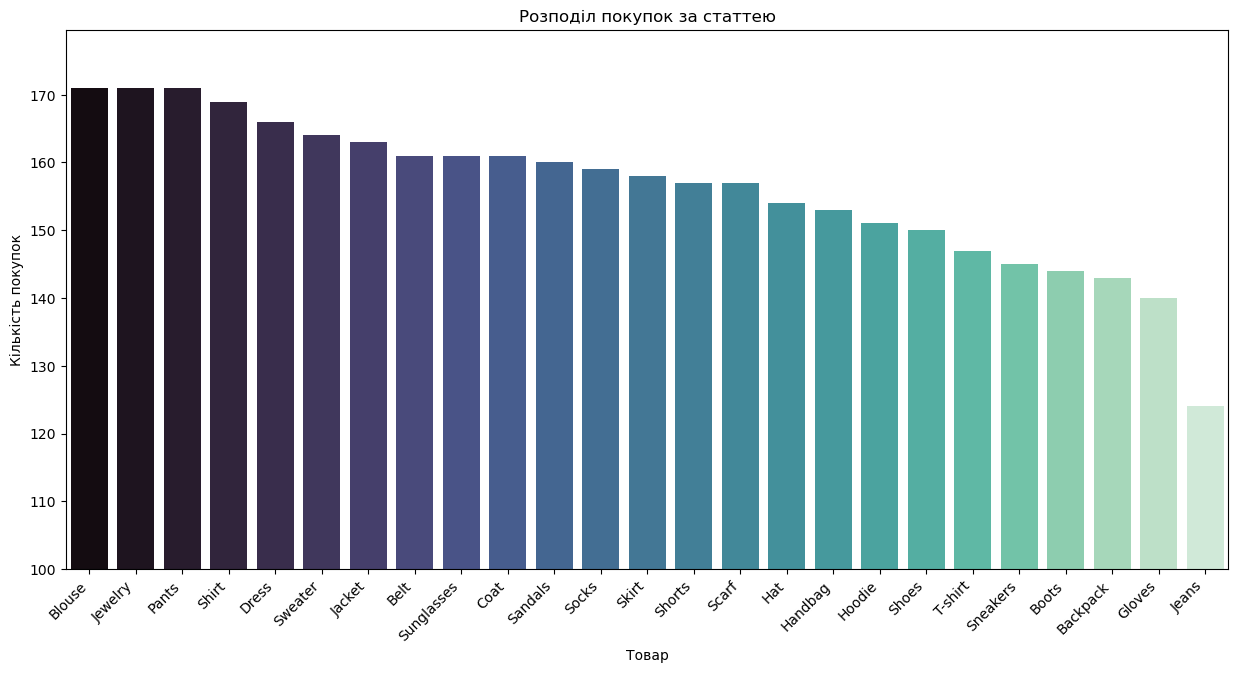

In [14]:
plt.figure(figsize=(15, 7))
sns.countplot(data=data, x='item_purchased', order=data.item_purchased.value_counts().index, palette='mako')
plt.xticks(rotation=45, ha='right')  # Повертає назви товарів для зручності
plt.ylim(100) #розпочнемо відлік кількості з 100
plt.title('Розподіл покупок за статтею')
plt.xlabel('Товар')
plt.ylabel('Кількість покупок');

TOP 3 категорії товарів: 
- блузи
- прикраси 
- рослини

**Завдання 3**

Використовуйте scatter plot, щоб візуалізувати залежність між віком та сумою покупок.

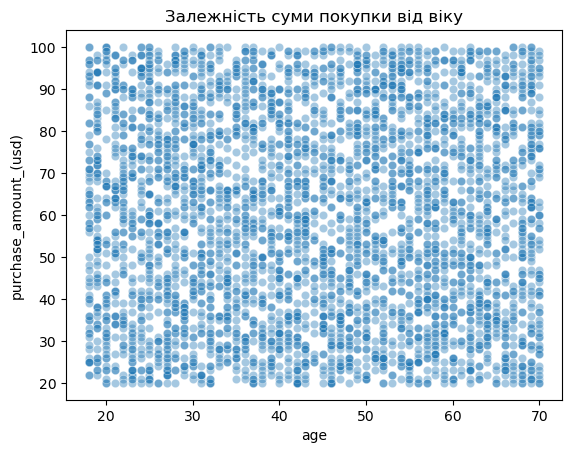

In [16]:
#sns.scatterplot(x=df['purchase_amount_(usd)'], y=df.age)
sns.scatterplot(data=data, x='age', y='purchase_amount_(usd)', alpha=0.4)
plt.title('Залежність суми покупки від віку');

## Висновок :
Дана візуалізаціє не є читабельною і важко зробити певні висновки. Варто розділити клієнтів на певні вікові групи та дослідити дані для кожної групи

**Завдання 4**

Побудуйте графік розподілу оцінок товарів для оцінки якості.

Text(0, 0.5, 'Кількість оцінок')

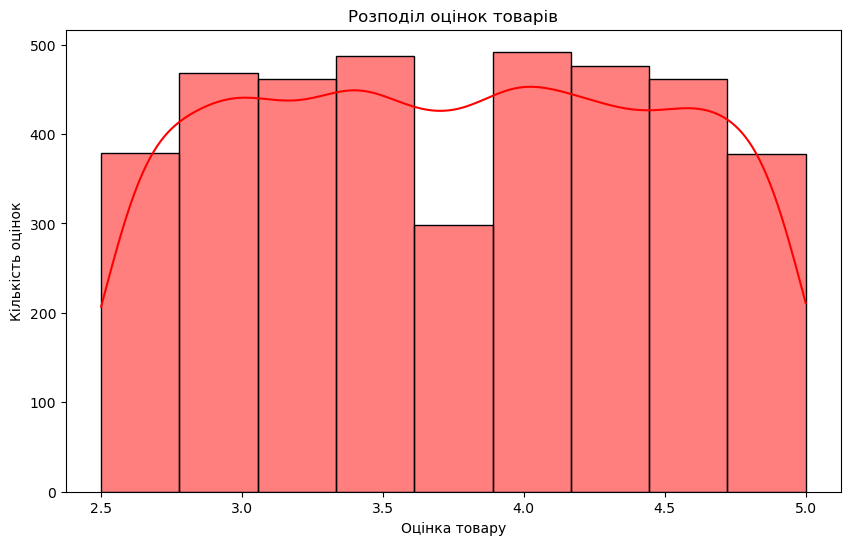

In [21]:
plt.figure(figsize=(10,6))
sns.histplot(data=data, x='review_rating', bins=9, color='red', kde=True)
plt.title('Розподіл оцінок товарів')
plt.xlabel('Оцінка товару')
plt.ylabel('Кількість оцінок')

## Висновок :
Багато товарів мають середню оцінку 3-4, варто розгялнути ті товари, які мають низьку оцінку та вияснити чому це так, що варто покращити. Також маємо певний викид на діапазоні оцінок 3.5-4.0, варто розглянути що це саме за товари чи можливо це помилки в наших даних.

**Завдання 5**

Створіть категоріальну діаграму, щоб відобразити розподіл покупок за статтею покупців. 

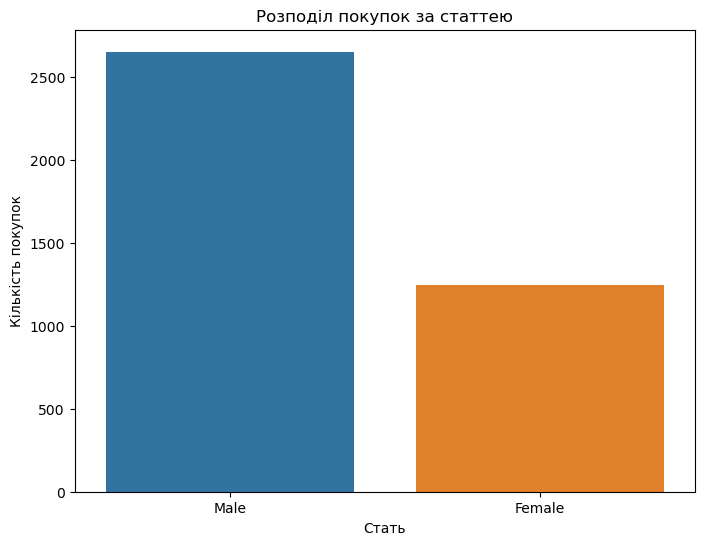

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='gender',)
plt.title('Розподіл покупок за статтею')
plt.xlabel('Стать')
plt.ylabel('Кількість покупок');

## Висновок :
Бачимо, що чоловіки купують набагато частіше. При створенні акцій, реклами варто на це звернути увагу. Також можна подивитись на середній чек жінок та чоловіків, можливо жінки купують дорожчі товари.

**Завдання 6**

Вивчіть, чи існує зв'язок між рейтингом товару і сумою покупок за допомогою scatter plot. 

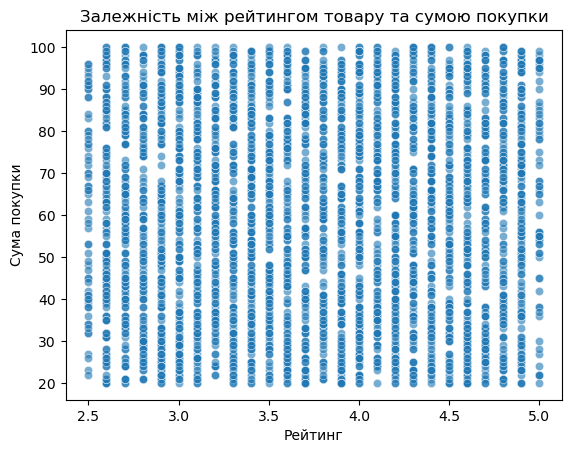

In [23]:
sns.scatterplot(data=data, x='review_rating', y='purchase_amount_(usd)', alpha=0.6)

plt.title('Залежність між рейтингом товару та сумою покупки')
plt.xlabel('Рейтинг')
plt.ylabel('Сума покупки');

## Висновок :
Також не є читабельною дана діаграма, з якої не можна зробити конкретні висновки. Бачимо, що на усі товари і з низьким рейтингом та високим завжди є покупці

**Завдання 7**

Побудуйте стовпчату діаграму, яка відображає, в який сезон клієнти роблять найбільше покупок. 

In [24]:
data.season.unique()

array(['Winter', 'Spring', 'Summer', 'Fall'], dtype=object)

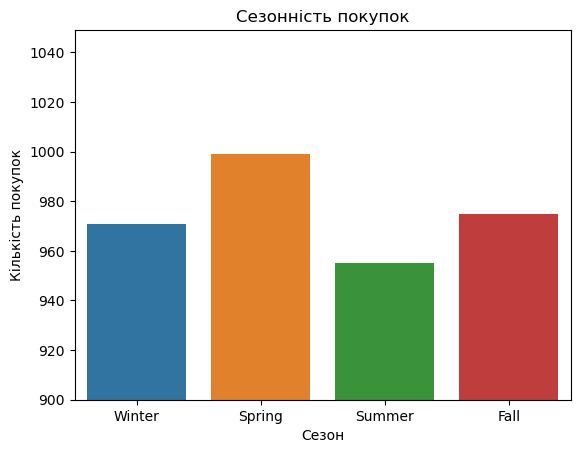

In [28]:
sns.countplot(data=data, x='season')
plt.title('Сезонність покупок')
plt.ylim(900)
plt.xlabel('Сезон')
plt.ylabel('Кількість покупок');

## Висновок :
Весною купують найчастіше. В інші періоди варто застосувати різні заохочувальні програми, акції.

**Завдання 8**

Створіть графік розподілу розмірів одягу, щоб визначити популярність різних розмірів. 

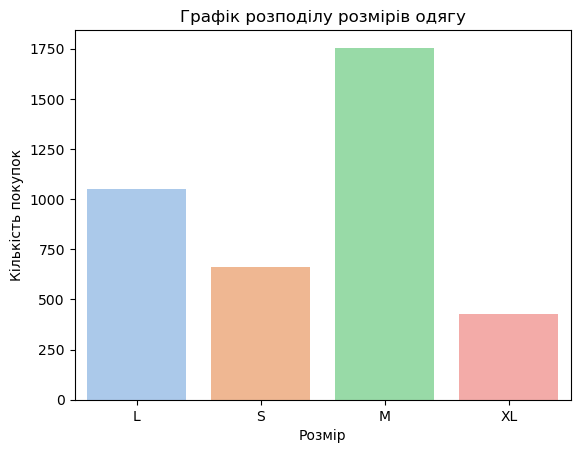

In [30]:
sns.countplot(data=data, x='size',palette='pastel')
plt.title('Графік розподілу розмірів одягу')
plt.xlabel('Розмір')
plt.ylabel('Кількість покупок');

## Висновок :
Розмір M та L є найпопулярнішим. 

**Завдання 9**

Порівняйте, скільки покупок робиться за різними методами оплати за допомогою стовпчатої діаграми. 

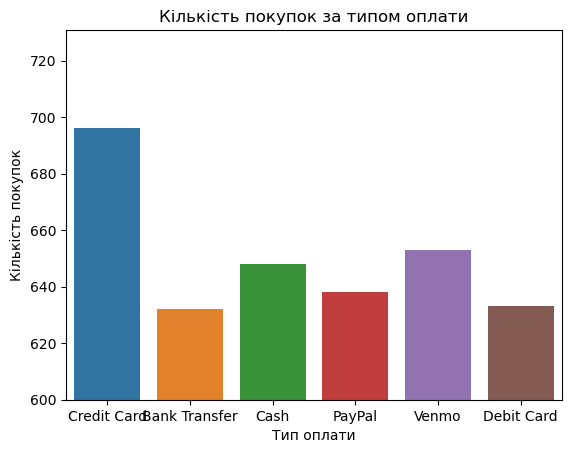

In [32]:
sns.countplot(data=data, x='payment_method')
plt.title('Кількість покупок за типом оплати')
plt.ylim(600)
plt.xlabel('Тип оплати')
plt.ylabel('Кількість покупок');

## Висновок :
Варіант оплати кредитною картою найпопулярніший.

**Завдання 10**

Створіть scatter plot для визначення, чи існує зв'язок між кількістю попередніх покупок та сумою поточної покупки. обиться за різними методами оплати за допомогою стовпчатої діаграми. 

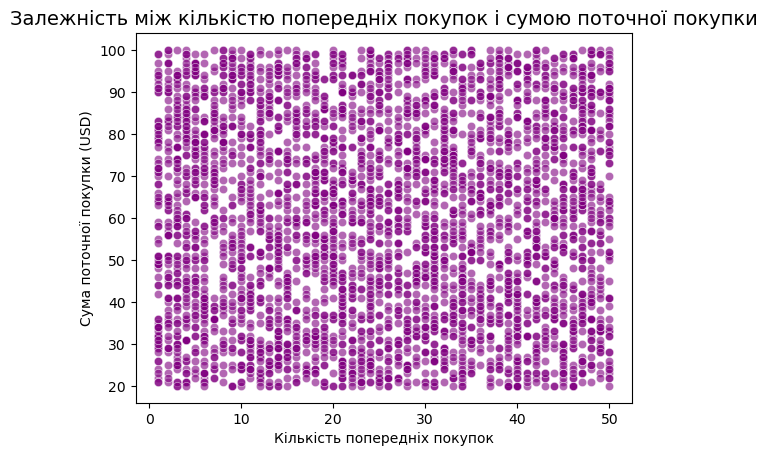

In [33]:
sns.scatterplot(data=data, x='previous_purchases', y='purchase_amount_(usd)', color='purple', alpha=0.6)
plt.title('Залежність між кількістю попередніх покупок і сумою поточної покупки',fontsize=14)
plt.xlabel('Кількість попередніх покупок')
plt.ylabel('Сума поточної покупки (USD)');

# Завдання 2

Побудуйте графік поверхні (3D surface plot) для візуалізації залежності між трьома числовими змінними з використанням бібліотеки Seaborn. 

Налаштуйте відображення графіка, включаючи назву графіку, підписи осей і інші необхідні параметри для кращого розуміння візуалізації. 

Додайте кольорову легенду. 

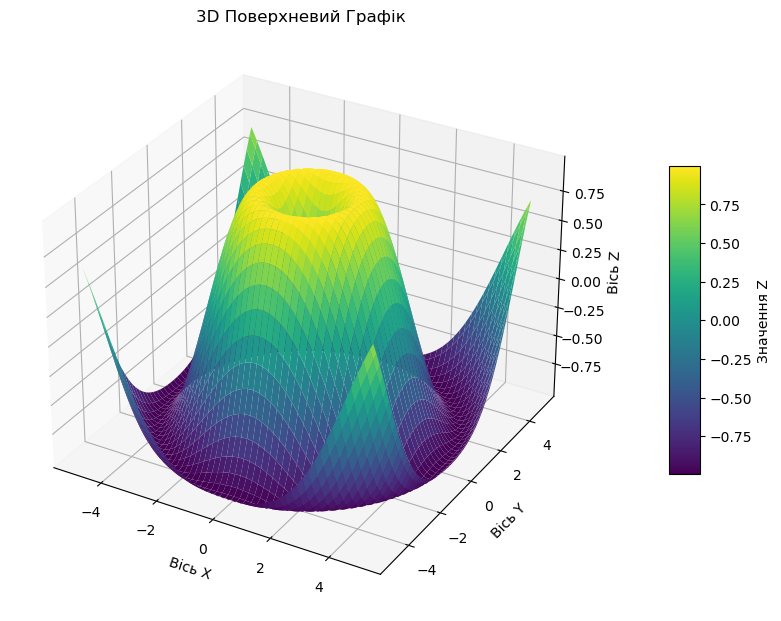

In [35]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)
z = np.sin(np.sqrt(x**2 + y**2))

# Побудова 3D поверхневого графіка з використанням Matplotlib
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(x, y, z, cmap='viridis')

ax.set_title('3D Поверхневий Графік')
ax.set_xlabel('Вісь X')
ax.set_ylabel('Вісь Y')
ax.set_zlabel('Вісь Z')

# Додавання кольорової легенди з використанням Seaborn
colorbar = fig.colorbar(surface, ax=ax, shrink=0.5, aspect=10, pad=0.1)
colorbar.set_label('Значення Z');

# Завдання 3

Побудуйте графік теплової поверхні для візуалізації залежності між двома або більше числовими змінними на основі матриці даних, використовуючи бібліотеку Seaborn. 

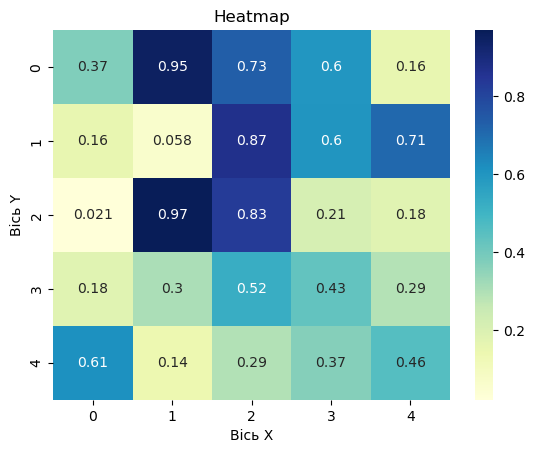

In [36]:
np.random.seed(42)  # Щоб результат був відтворюваний
data_matrix = np.random.rand(5, 5)
heatmap = sns.heatmap(data_matrix, annot=True, cmap="YlGnBu", cbar=True)
plt.title('Heatmap')
plt.xlabel('Вісь X')
plt.ylabel('Вісь Y');